In [5]:
from tensorflow import keras 
from keras.datasets import mnist 
from keras.models import Sequential 
from keras.layers import Input,Dense, Dropout, Conv2D, MaxPooling2D, Flatten 
from keras.optimizers import RMSprop, Adam

In [8]:
(img_train_og,label_train_og),(img_test_og,label_test_og)=mnist.load_data() 

In [16]:
from tensorflow.keras import backend as k


In [33]:
if k.image_data_format() == 'channels_first':
    img_train = img_train_og.reshape(img_train_og.shape[0],1,28,28)
    img_test = img_test_og.reshape(img_test_og.shape[0],1,28,28)
    input_shape= (1,28,28)
else:
    img_train = img_train_og.reshape(img_train_og.shape[0],28,28,1)
    img_test = img_test_og.reshape(img_test_og.shape[0],28,28,1)
    input_shape = (28,28,1)
img_train=img_train.astype('float32')
img_test=img_test.astype('float32')
img_train /=255.
img_test /=255.

In [18]:
label_train = keras.utils.to_categorical(label_train_og,10)
label_test = keras.utils.to_categorical(label_test_og,10)

In [19]:
import matplotlib.pyplot as plt 


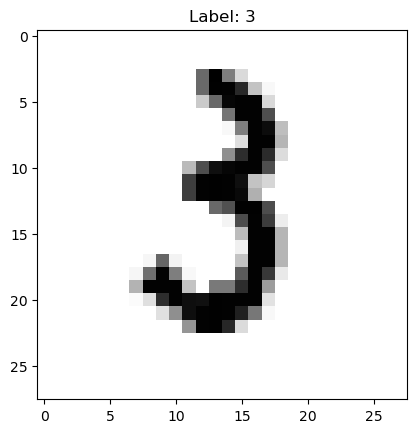

In [25]:
def display_sample(num):
    true_label = label_train[num].argmax(axis=0)
    plt.title('Label: %s' % true_label)
    image = img_train[num].reshape([28,28])
    plt.imshow(image, cmap = plt.get_cmap('gray_r'))
    plt.show()
display_sample(1234)

In [43]:
model = Sequential()
model.add(Input(shape=input_shape))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu' ))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))


In [44]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adam',metrics = ['Accuracy'])

In [46]:
model.fit(img_train,label_train,
          batch_size = 32,
          epochs = 10,
          verbose =2,
          validation_data = (img_test,label_test))

Epoch 1/10
1875/1875 - 44s - 24ms/step - Accuracy: 0.9434 - loss: 0.1883 - val_Accuracy: 0.9854 - val_loss: 0.0429
Epoch 2/10
1875/1875 - 45s - 24ms/step - Accuracy: 0.9766 - loss: 0.0784 - val_Accuracy: 0.9855 - val_loss: 0.0418
Epoch 3/10
1875/1875 - 42s - 22ms/step - Accuracy: 0.9812 - loss: 0.0594 - val_Accuracy: 0.9898 - val_loss: 0.0343
Epoch 4/10
1875/1875 - 40s - 21ms/step - Accuracy: 0.9841 - loss: 0.0504 - val_Accuracy: 0.9898 - val_loss: 0.0300
Epoch 5/10
1875/1875 - 40s - 21ms/step - Accuracy: 0.9869 - loss: 0.0418 - val_Accuracy: 0.9918 - val_loss: 0.0267
Epoch 6/10
1875/1875 - 42s - 22ms/step - Accuracy: 0.9890 - loss: 0.0367 - val_Accuracy: 0.9902 - val_loss: 0.0324
Epoch 7/10
1875/1875 - 42s - 23ms/step - Accuracy: 0.9890 - loss: 0.0341 - val_Accuracy: 0.9913 - val_loss: 0.0297
Epoch 8/10
1875/1875 - 40s - 21ms/step - Accuracy: 0.9917 - loss: 0.0274 - val_Accuracy: 0.9917 - val_loss: 0.0321
Epoch 9/10
1875/1875 - 41s - 22ms/step - Accuracy: 0.9912 - loss: 0.0277 - val_A

In [47]:
score = model.evaluate(img_test,label_test,verbose=0)
print('Loss :',score[0])
print('Accuracy : ',score[1])

Loss : 0.029430804774165154
Accuracy :  0.9919999837875366
